In [47]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,Dropout
from tensorflow.keras import Input,Model

In [6]:
df=pd.read_csv('merged_youtube_comments.csv')

In [7]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,Unnamed: 0
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1.0,NaN
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1.0,NaN
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1.0,NaN
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^...,1.0,NaN
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1.0,NaN


In [13]:
x=df[['CONTENT']]
y=df['CLASS']

In [15]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['CONTENT'])
seq=tokenizer.texts_to_sequences(df['CONTENT'])
max_length=100
pad_seq=pad_sequences(seq,maxlen=max_length)

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(pad_seq,df['CLASS'],test_size=0.2,random_state=42)

In [19]:
vocal_length=len(tokenizer.word_index)+1

In [21]:
inputs=Input(shape=(100,))
x=Embedding(vocal_length,32)(inputs)
x=SimpleRNN(64,return_sequences=True)(x)
x=Dropout(0.1)(x)
x=SimpleRNN(32)(x)
x=Dropout(0.1)(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.1)(x)
outputs=Dense(1,activation='sigmoid')(x)
model=Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 32)             │         158,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 100, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169,953 (663.88 KB)

 Trainable params: 169,953 (663.88 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
history=model.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest),validation_split=0.2)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 1.0000 - loss: 2.4406e-04 - val_accuracy: 0.9286 - val_loss: 0.2885
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 1.0000 - loss: 2.1339e-04 - val_accuracy: 0.9260 - val_loss: 0.2945
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 1.0000 - loss: 1.8609e-04 - val_accuracy: 0.9260 - val_loss: 0.2944
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 1.0000 - loss: 1.3047e-04 - val_accuracy: 0.9286 - val_loss: 0.2977
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 1.0000 - loss: 1.3173e-04 - val_accuracy: 0.9286 - val_loss: 0.3003
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 1.0000 - loss: 3.2806e-04 - val_accuracy: 0.9260 - val_loss: 0.3090
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 1.0000 - loss: 1.5446e-04 - val_accuracy: 0.9260 - val_loss: 0.3052
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 1.0000 - loss: 1.092

In [27]:
ypred=(model.predict(xtest)>0.5).astype("int32")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [53]:
cm=confusion_matrix(ypred,ytest)
cm

array([[160,  14],
       [ 16, 202]], dtype=int64)

In [31]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       174
           1       0.94      0.93      0.93       218

    accuracy                           0.92       392
   macro avg       0.92      0.92      0.92       392
weighted avg       0.92      0.92      0.92       392



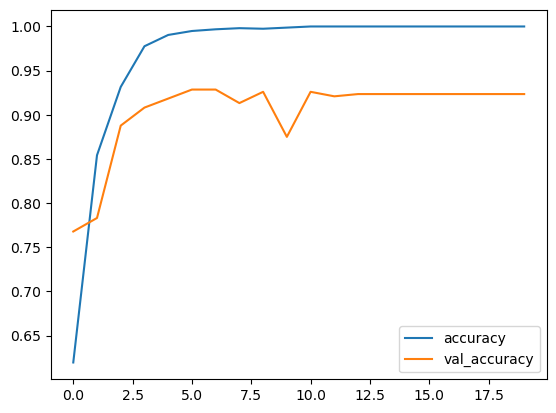

In [33]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

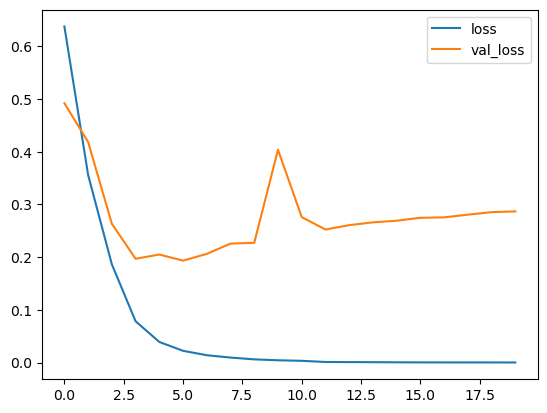

In [35]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [37]:
def predict_md(comment):
    seq=tokenizer.texts_to_sequences(comment)
    pad=pad_sequences(seq,maxlen=max_length)
    prediction=model.predict(pad)[0][0]
    comfi=prediction if(prediction>0.5) else 1-prediction
    print(comfi)
    return 'spam' if prediction>0.5 else 'ham'

In [39]:
print(predict_md('Huh, anyway check out this you[tube] channel:'))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.9995397714956198
ham
